In [5]:
import corner
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import lines as mlines
from astropy.cosmology import Planck15 as Planck18_arXiv_v2

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
CB_color_cycle=sns.color_palette('colorblind').as_hex()

In [6]:
Planck18_arXiv_v2.Om0

0.3075

In [7]:
data_bns = np.genfromtxt('NRSur/planck_mass_prior_all_GW170817/emcee_label/chain.dat',names=True)
data_bbh = np.genfromtxt('NRSur/planck_mass_prior_all_GW190521/emcee_label/chain.dat',names=True)
data_joint = np.genfromtxt('NRSur/planck_mass_prior_all_GW170817_GW190521/emcee_label/chain.dat',names=True)

var_to_stack = ['H0','Om0','cm']

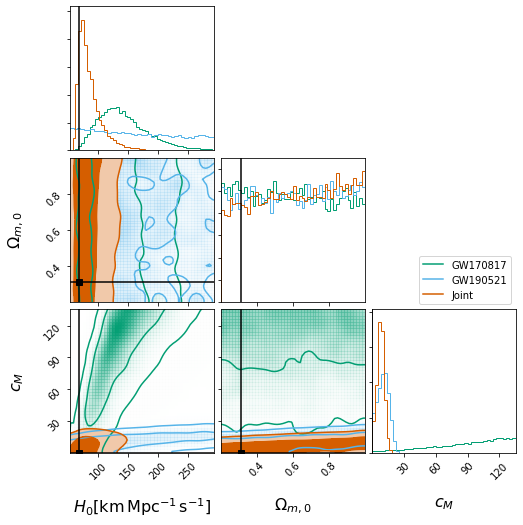

In [8]:

ll=[]

fig = corner.corner(np.column_stack([data_bns[v] for v in var_to_stack]), 
                    labels=[r'$H_0 \rm{[km \, Mpc^{-1} \, s^{-1}]}$',r'$\Omega_{m,0}$',r'$c_M$']
                    , color=CB_color_cycle[2], plot_datapoints=False, fill_contours=False, bins=50, 
                    smooth=2.0, levels=[0.68,0.95], label_kwargs={"fontsize": 16});

ll.append(mlines.Line2D([], [], color=CB_color_cycle[2], label='GW170817'))


corner.corner(np.column_stack([data_bbh[v] for v in var_to_stack]), 
                    labels=[r'$H_0 \rm{[km \, Mpc^{-1} \, s^{-1}]}$',r'$\Omega_{m,0}$',r'$c_M$']
                    , color=CB_color_cycle[9], plot_datapoints=False, fill_contours=False, bins=50, 
                    smooth=2.0, levels=[0.68,0.95], label_kwargs={"fontsize": 16},fig=fig);

ll.append(mlines.Line2D([], [], color=CB_color_cycle[9], label='GW190521'))


corner.corner(np.column_stack([data_joint[v] for v in var_to_stack]),
                    labels=[r'$H_0 \rm{[km \, Mpc^{-1} \, s^{-1}]}$',r'$\Omega_{m,0}$',r'$c_M$']
                    , color=CB_color_cycle[3], plot_datapoints=False, fill_contours=True, bins=50, 
                    smooth=2.0, levels=[0.68,0.95], label_kwargs={"fontsize": 16},fig=fig,truths=[67.66,0.311,0],
                    truth_color='black');

ll.append(mlines.Line2D([], [], color=CB_color_cycle[3], label='Joint'))

plt.legend(handles=ll, bbox_to_anchor=(0., 1.0, 1., .0), loc=4)



plt.savefig('figures/planck_mass.pdf')

In [9]:
data_joint = np.genfromtxt('NRSur/RTmodel_mass_prior_all_GW170817_GW190521/emcee_label/chain.dat',names=True)

var_to_stack = ['H0','Om0','csi0','n']

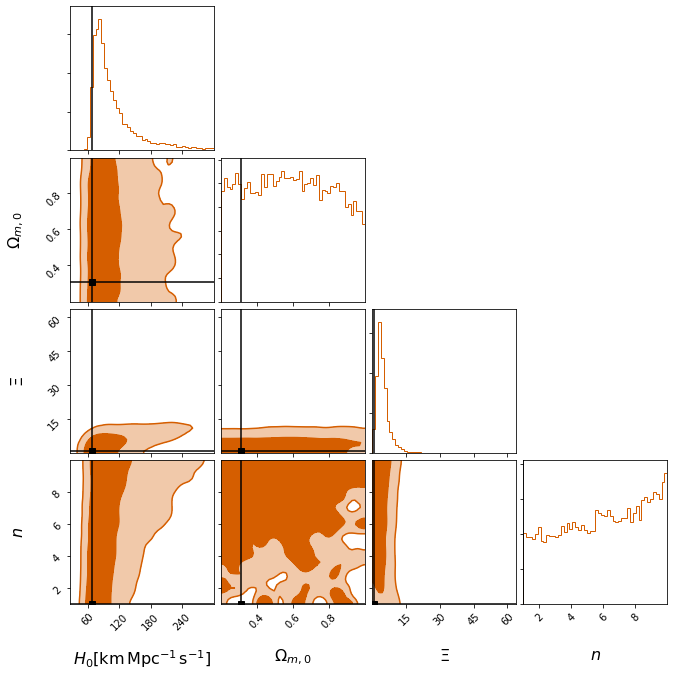

In [10]:
fig = corner.corner(np.column_stack([data_joint[v] for v in var_to_stack]),
                    labels=[r'$H_0 \rm{[km \, Mpc^{-1} \, s^{-1}]}$',r'$\Omega_{m,0}$',r'$\Xi$',r'$n$']
                    , color=CB_color_cycle[3], plot_datapoints=False, fill_contours=True, bins=50, 
                    smooth=2.0, levels=[0.68,0.95], label_kwargs={"fontsize": 16},truths=[67.66,0.3111,1,1],
                    truth_color='black')

plt.savefig('figures/RR_model.pdf')

In [11]:
data_joint = np.genfromtxt('NRSur/EXTRA_dimension_Dextended_prior_all_GW170817_GW190521/emcee_label/chain.dat',names=True)

var_to_stack = ['H0','Om0','D']

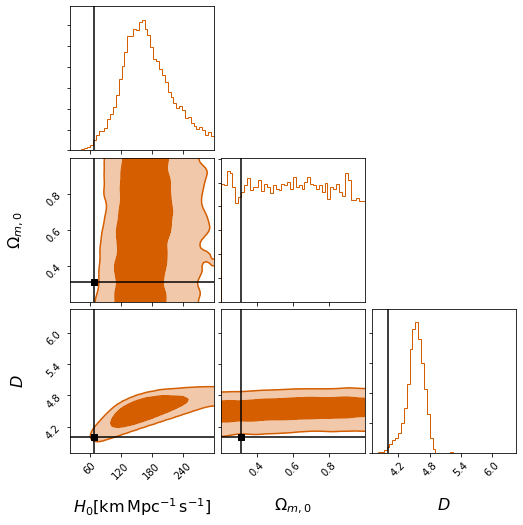

In [12]:
fig = corner.corner(np.column_stack([data_joint[v] for v in var_to_stack]),
                    labels=[r'$H_0 \rm{[km \, Mpc^{-1} \, s^{-1}]}$',r'$\Omega_{m,0}$',r'$D$']
                    , color=CB_color_cycle[3], plot_datapoints=False, fill_contours=True, bins=50, 
                    smooth=2.0, levels=[0.68,0.95], label_kwargs={"fontsize": 16},truths=[67.66,0.3111,4],
                    truth_color='black')
plt.savefig('figures/D_dimensions.pdf')

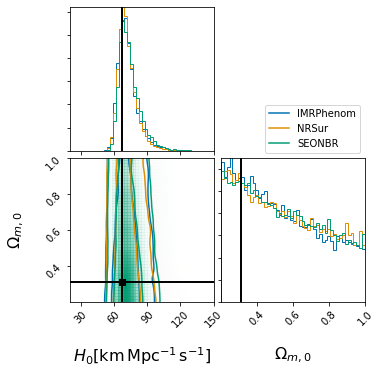

In [13]:
import matplotlib.lines as mlines

var_to_stack = ['H0','Om0']

i=1

ll=[]



data_joint = np.genfromtxt('IMRPhenom'+
                               '/running_GR_all_GW170817_GW190521/emcee_label/chain.dat',names=True)

fig=corner.corner(np.column_stack([data_joint[v] for v in var_to_stack]),
                    labels=[r'$H_0 \rm{[km \, Mpc^{-1} \, s^{-1}]}$',r'$\Omega_{m,0}$',r'$D$']
                    , color=CB_color_cycle[0], plot_datapoints=False, fill_contours=False, bins=50, 
                    smooth=2.0, levels=[0.68,0.95], label_kwargs={"fontsize": 16},truths=[67.66,0.3111,4],
                    truth_color='black', range = [(20,150),(0.2,1)])

ll.append(mlines.Line2D([], [], color=CB_color_cycle[0], label='IMRPhenom'))



for wave in ['NRSur','SEONBR']:

    data_joint = np.genfromtxt(wave+
                               '/running_GR_all_GW170817_GW190521/emcee_label/chain.dat',names=True)



    corner.corner(np.column_stack([data_joint[v] for v in var_to_stack]),
                        labels=[r'$H_0 \rm{[km \, Mpc^{-1} \, s^{-1}]}$',r'$\Omega_{m,0}$',r'$D$']
                        , color=CB_color_cycle[i], plot_datapoints=False, fill_contours=False, bins=50, 
                        smooth=2.0, levels=[0.68,0.95], label_kwargs={"fontsize": 16},truths=[67.66,0.3111,4],
                        truth_color='black',fig=fig,range = [(20,150),(0.2,1)])
    
    ll.append(mlines.Line2D([], [], color=CB_color_cycle[i], label=wave))
    
    i+=1

plt.legend(handles=ll, bbox_to_anchor=(0., 1.0, 1., .0), loc=4)

plt.savefig('figures/test_run.pdf')

In [14]:
print(np.median(data_joint['Om0']),
      np.percentile(data_joint['Om0'],68*.5+50)-np.median(data_joint['Om0']),
      np.percentile(data_joint['Om0'],-68*.5+50)-np.median(data_joint['Om0']))

0.5209955450499999 0.2970279170500001 -0.22801841974199993


In [15]:
print(np.median(data_joint['H0']),
      np.percentile(data_joint['H0'],68*.5+50)-np.median(data_joint['H0']),
      np.percentile(data_joint['H0'],-68*.5+50)-np.median(data_joint['H0']))

72.09925247 10.79409179320001 -6.6755186099999975


In [16]:
varl=['H0','Om0','cm']

for var in varl:
    print(var)
    for waveform in ['NRSur','IMRPhenom','SEONBR']:
    
        data_p = np.genfromtxt(waveform+'/planck_mass_prior_planck_GW170817_GW190521/emcee_label/chain.dat',names=True)
        data_nop = np.genfromtxt(waveform+'/planck_mass_prior_all_GW170817_GW190521/emcee_label/chain.dat',names=True)
    
        if var == 'cm':
            print('& ${:.2f}$ & ${:.2f}$'.format(
                np.percentile(data_nop[var],95),np.percentile(data_p[var],95)))
        else:
            p_mid = np.median(data_p[var])
            nop_mid = np.median(data_nop[var])
            
            p_top =np.percentile(data_p[var],50+0.5*95)-np.median(data_p[var])
            nop_top =np.percentile(data_nop[var],50+0.5*95)-np.median(data_nop[var])
            
            p_bot =np.percentile(data_p[var],50-0.5*95)-np.median(data_p[var])
            nop_bot =np.percentile(data_nop[var],50-0.5*95)-np.median(data_nop[var])
            
            print('&${:.1f}^{{+{:.1f}}}_{{{:.1f}}}$ & ${:2.3f}^{{+{:.3f}}}_{{{:.3f}}}$'.format(
            nop_mid,nop_top,nop_bot,p_mid,p_top,p_bot))




H0
&$80.6^{+66.3}_{-17.3}$ & $67.676^{+0.787}_{-0.824}$
&$79.2^{+60.3}_{-16.3}$ & $67.682^{+0.811}_{-0.841}$
&$80.7^{+67.4}_{-17.6}$ & $67.684^{+0.807}_{-0.831}$
Om0
&$0.6^{+0.4}_{-0.4}$ & $0.311^{+0.011}_{-0.011}$
&$0.6^{+0.4}_{-0.4}$ & $0.311^{+0.011}_{-0.011}$
&$0.6^{+0.3}_{-0.4}$ & $0.311^{+0.011}_{-0.011}$
cm
& $13.34$ & $7.54$
& $11.69$ & $6.27$
& $10.83$ & $5.74$


In [20]:
varl=['H0','Om0','D']

for var in varl:
    print(var)
    for waveform in ['NRSur','IMRPhenom','SEONBR']:
    
        data_p = np.genfromtxt(waveform+'/EXTRA_dimension_Dextended_prior_planck_GW170817_GW190521/emcee_label/chain.dat',names=True)
        data_nop = np.genfromtxt(waveform+'/EXTRA_dimension_Dextended_prior_all_GW170817_GW190521/emcee_label/chain.dat',names=True)
    
        if var == 'cm':
            print('& ${:.2f}$ & ${:.2f}$'.format(
                np.percentile(data_nop[var],95),np.percentile(data_p[var],95)))
        else:
            p_mid = np.median(data_p[var])
            nop_mid = np.median(data_nop[var])
            
            p_top =np.percentile(data_p[var],50+0.5*95)-np.median(data_p[var])
            nop_top =np.percentile(data_nop[var],50+0.5*95)-np.median(data_nop[var])
            
            p_bot =np.percentile(data_p[var],50-0.5*95)-np.median(data_p[var])
            nop_bot =np.percentile(data_nop[var],50-0.5*95)-np.median(data_nop[var])
            
            print('&${:.1f}^{{+{:.1f}}}_{{{:.1f}}}$ & ${:2.3f}^{{+{:.3f}}}_{{{:.3f}}}$'.format(
            nop_mid,nop_top,nop_bot,p_mid,p_top,p_bot))





H0
&$166.5^{+112.8}_{-83.0}$ & $67.667^{+0.824}_{-0.788}$
&$152.3^{+120.4}_{-64.8}$ & $67.696^{+0.831}_{-0.828}$
&$140.6^{+129.9}_{-73.8}$ & $67.663^{+0.820}_{-0.794}$
Om0
&$0.6^{+0.4}_{-0.4}$ & $0.311^{+0.011}_{-0.011}$
&$0.6^{+0.4}_{-0.4}$ & $0.311^{+0.011}_{-0.011}$
&$0.6^{+0.4}_{-0.4}$ & $0.311^{+0.011}_{-0.011}$
D
&$4.5^{+0.3}_{-0.4}$ & $3.994^{+0.078}_{-0.088}$
&$4.5^{+0.3}_{-0.3}$ & $4.012^{+0.099}_{-0.103}$
&$4.4^{+0.3}_{-0.4}$ & $3.996^{+0.087}_{-0.103}$


In [22]:
varl=['H0','Om0','csi0','n']

for var in varl:
    print(var)
    for waveform in ['NRSur','IMRPhenom','SEONBR']:
    
        data_p = np.genfromtxt(waveform+'/RTmodel_mass_prior_planck_GW170817_GW190521/emcee_label/chain.dat',names=True)
        data_nop = np.genfromtxt(waveform+'/RTmodel_mass_prior_all_GW170817_GW190521/emcee_label/chain.dat',names=True)
    
        if var == 'csi0':
            print('& ${:.2f}$ & ${:.2f}$'.format(
                np.percentile(data_nop[var],95),np.percentile(data_p[var],95)))
        else:
            p_mid = np.median(data_p[var])
            nop_mid = np.median(data_nop[var])
            
            p_top =np.percentile(data_p[var],50+0.5*95)-np.median(data_p[var])
            nop_top =np.percentile(data_nop[var],50+0.5*95)-np.median(data_nop[var])
            
            p_bot =np.percentile(data_p[var],50-0.5*95)-np.median(data_p[var])
            nop_bot =np.percentile(data_nop[var],50-0.5*95)-np.median(data_nop[var])
            
            print('&${:.0f}^{{+{:.0f}}}_{{{:.0f}}}$ & ${:2.1f}^{{+{:.1f}}}_{{{:.1f}}}$'.format(
            nop_mid,nop_top,nop_bot,p_mid,p_top,p_bot))






H0
&$93^{+148}_{-27}$ & $67.7^{+0.8}_{-0.8}$
&$90^{+126}_{-25}$ & $67.7^{+0.8}_{-0.8}$
&$87^{+119}_{-23}$ & $67.7^{+0.8}_{-0.8}$
Om0
&$1^{+0}_{-0}$ & $0.3^{+0.0}_{-0.0}$
&$1^{+0}_{-0}$ & $0.3^{+0.0}_{-0.0}$
&$1^{+0}_{-0}$ & $0.3^{+0.0}_{-0.0}$
csi0
& $9.99$ & $4.42$
& $8.15$ & $3.60$
& $7.04$ & $2.87$
n
&$6^{+4}_{-5}$ & $4.4^{+5.3}_{-3.2}$
&$6^{+4}_{-5}$ & $4.5^{+5.2}_{-3.3}$
&$6^{+4}_{-5}$ & $4.6^{+5.1}_{-3.5}$
